In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CCTV_Seoul = pd.read_csv("../data/01. CCTV_in_Seoul.csv", encoding='utf-8')
CCTV_Seoul.head()
CCTV_Seoul.columns
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace = True)
CCTV_Seoul.head()
CCTV_Seoul.loc[:, ['구별']]

pop_Seoul = pd.read_excel('../data/01. population_in_Seoul2.xls', header=2, encoding = 'utf-8')
pop_Seoul2 = pop_Seoul.loc[:,['자치구','계','계.1','계.2','65세이상고령자']]
pop_Seoul3 = pop_Seoul2.rename(columns = {'자치구':'구별',
                                    '계':'인구수',
                                    '계.1':'한국인',
                                    '계.2':'외국인',
                                    '65세이상고령자':'고령자'})
CCTV_Seoul.head()
CCTV_Seoul.sort_values(by='소계', ascending=True).head()
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

CCTV_Seoul['최근 증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] +CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전'] *100
CCTV_Seoul.sort_values(by = '최근 증가율', ascending = False).head()
pop_Seoul3.head()

pop_Seoul3.drop([0])

pop_Seoul3[pop_Seoul3['구별'].isnull()]
pop_Seoul3['외국인비율'] = pop_Seoul3['외국인'] / pop_Seoul3['인구수'] * 100
pop_Seoul3['고령자비율'] = pop_Seoul3['고령자'] / pop_Seoul3['인구수'] * 100
pop_Seoul3.sort_values(by='인구수', ascending = False).head(5)
pop_Seoul3.sort_values(by='외국인', ascending = False).head(5)
pop_Seoul3.sort_values(by='외국인비율', ascending = False).head(5)

data_result = pd.merge(CCTV_Seoul, pop_Seoul3, on='구별')
data_result

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result

data_result.set_index('구별', inplace=True)
data_result
np.corrcoef(data_result['고령자비율'], data_result['소계'])
np.corrcoef(data_result['외국인비율'], data_result['소계'])
np.corrcoef(data_result['인구수'], data_result['소계'])

data_result.sort_values(by='소계', ascending=False)
data_result.sort_values(by='인구수', ascending=False)



,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483,660584,6899,72506,1.033584,10.862599
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
노원구,1265,188.929889,569384,565565,3819,71941,0.670725,12.634883
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291
은평구,1873,85.237258,494388,489943,4445,72334,0.899091,14.631019
양천구,2034,34.671731,479978,475949,4029,52975,0.839413,11.036964
성북구,1464,63.627354,461260,449773,11487,64692,2.490353,14.025062
강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638


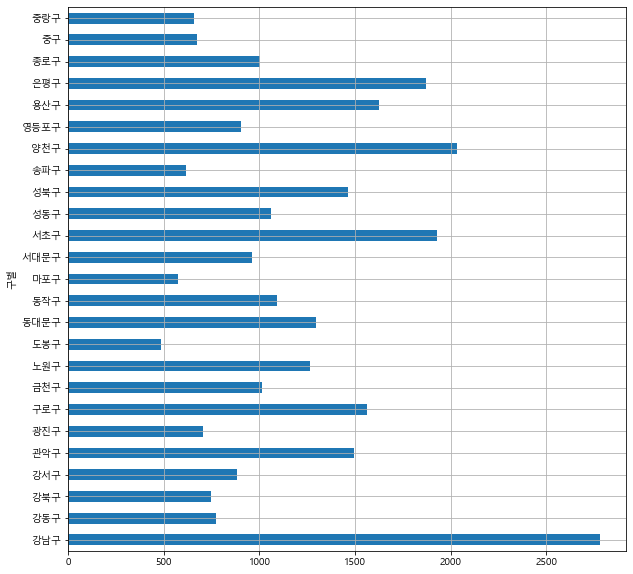

In [7]:
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', famaily = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system')

data_result.head()

data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))